In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join
import os
import glob
from matplotlib.pylab import rcParams

In [2]:
# Getting all the files in the directory.
def existing_file_list(path):
    ''' Extracting File Names '''

    allFiles = glob.glob(path + "/*.csv")
    new_list = []
    for i in allFiles:
        before = 'original\\'
        after = '_minute'
        ticker = i[i.find(before) + len(before) : i.find(after)]
        new_list.append(ticker)    
    #list_ticker = list(filter(None, text))  # drop all the empty elements and put them in a list
        
    return (new_list)

In [3]:
def imshow(image, cmap=None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [55]:
def histogram_equalizer(image):
    grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    ## CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit= 10.0, tileGridSize=(8,8))
    cl1 = clahe.apply(grayed_image)
    
    return cl1

height: 600, width: 573


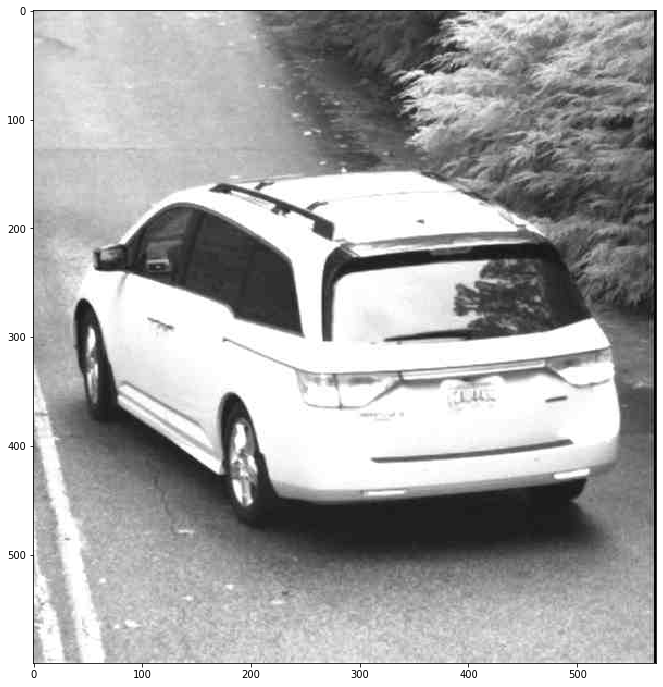

In [46]:
image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Results\\Segments\\'
from os import listdir
from os.path import isfile, join
data_list = [f for f in listdir(image_path) if isfile(join(image_path, f))]
data_list = sorted(data_list, key=lambda x: float(x.split('.')[0]))

# load the image
number = 75 #372 #423  #75 #682
image = cv2.imread(image_path + data_list[number]) # read as grayscale
img_height, img_width = image.shape[:2]
print(f'height: {img_height}, width: {img_width}')


rcParams['figure.figsize'] = 25, 12
grayed_cropped = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(grayed_cropped)

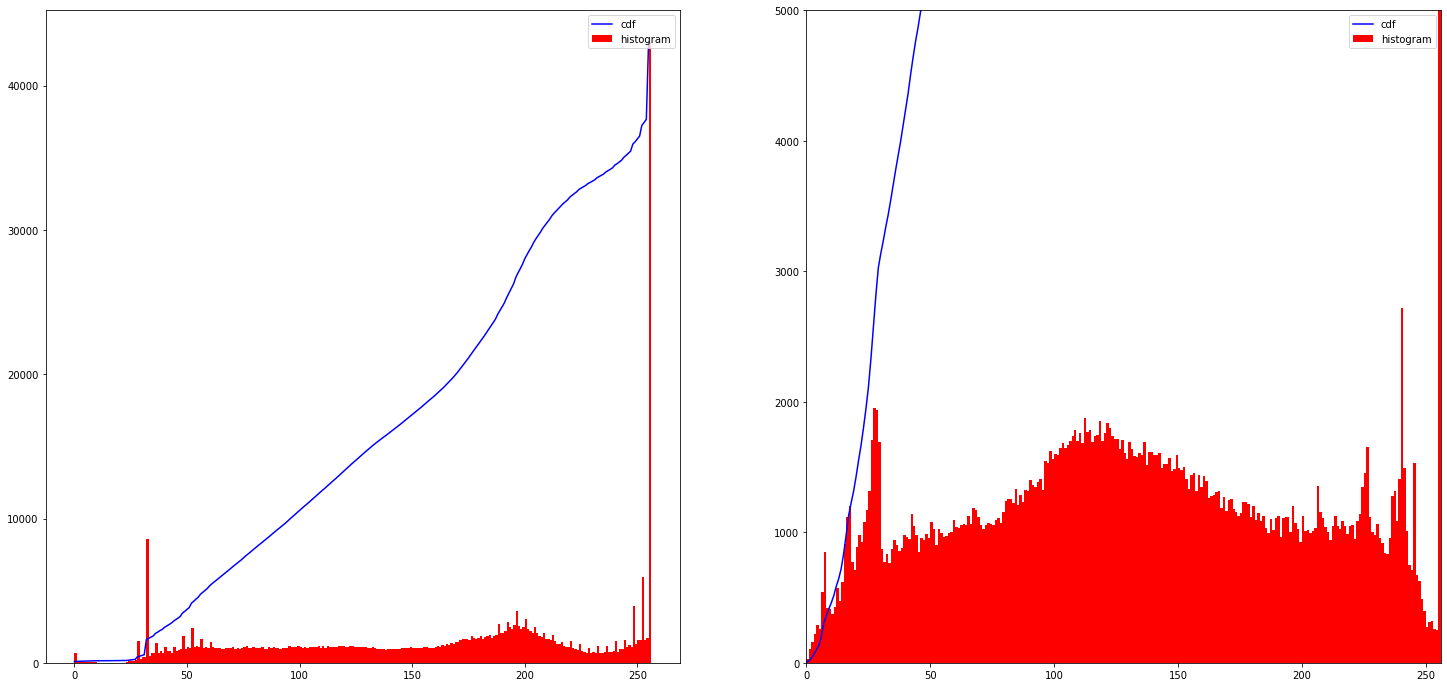

In [56]:
'''histogram equalization test'''

rcParams['figure.figsize'] = 25, 12

img = grayed_cropped
equ = cv2.equalizeHist(img)

## CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit= 10.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)


hist1,bins1 = np.histogram(img.flatten(),256,[0,256])
#hist2,bins2 = np.histogram(equ.flatten(),256,[0,256])
hist3,bins3 = np.histogram(cl1.flatten(),256,[0,256])


# cdf (cumulative distribution function) of the image
cdf1 = hist1.cumsum()
cdf_normalized1 = cdf1 *hist1.max()/ cdf1.max() # this line not necessary.

#cdf2 = hist2.cumsum()
#cdf_normalized2 = cdf2 *hist2.max()/ cdf2.max() # this line not necessary.

cdf3 = hist3.cumsum()
cdf_normalized3 = cdf3 *hist3.max()/ cdf3.max() # this line not necessary.




fig, ax = plt.subplots(1, 2)


ax[0].plot(cdf_normalized1, color = 'b')
#ax[1].plot(cdf_normalized2, color = 'b')
ax[1].plot(cdf_normalized3, color = 'b')

ax[0].hist(img.flatten(),256,[0,256], color = 'r')
#ax[1].hist(equ.flatten(),256,[0,256], color = 'r')
ax[1].hist(cl1.flatten(),256,[0,256], color = 'r')

ax[0].legend(('cdf','histogram'), loc = 'upper right')
#ax[1].legend(('cdf','histogram'), loc = 'upper right')
ax[1].legend(('cdf','histogram'), loc = 'upper right')


plt.xlim([0,256])
plt.ylim([0,5000])

plt.show()

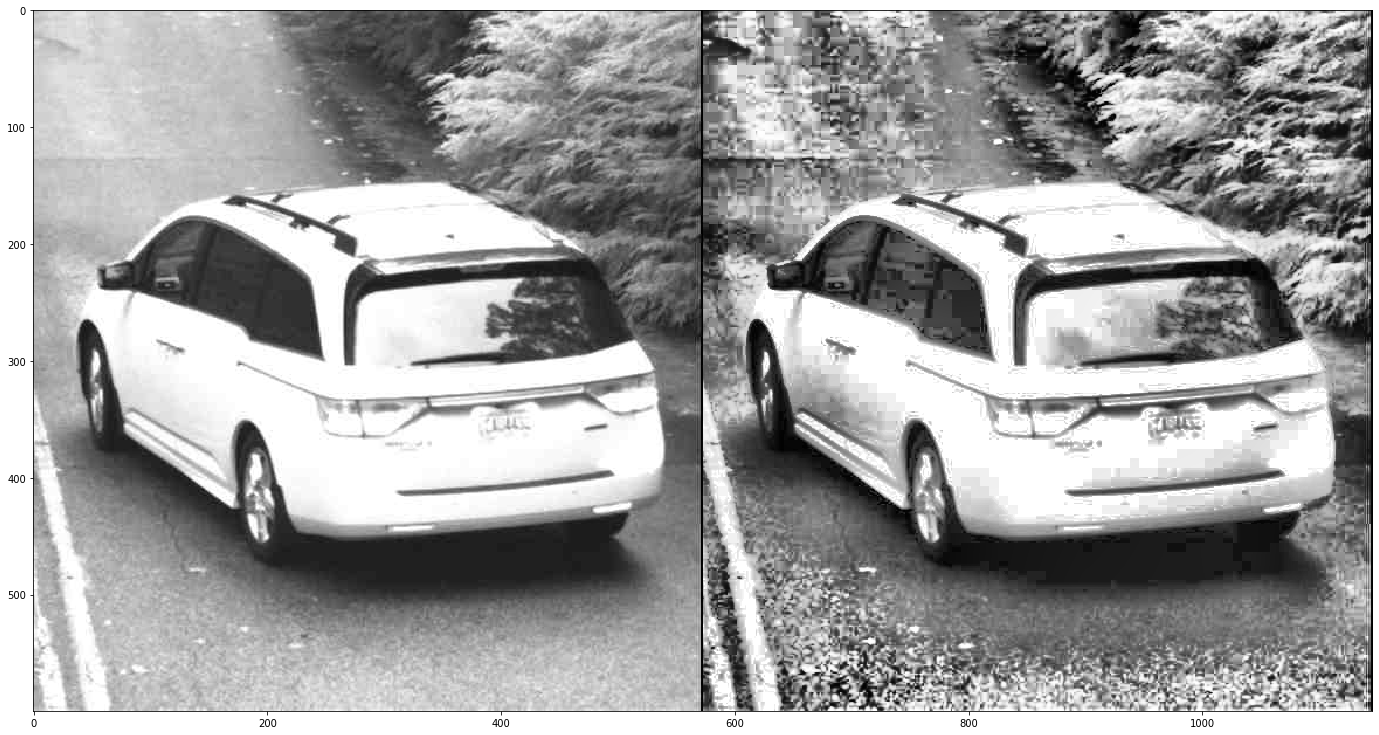

In [57]:
rcParams['figure.figsize'] = 24,24


images = np.hstack([img,cl1])
imshow(images)

# Run on a Batch

In [58]:
# set the saving directory to specified path 

result_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Results\\'

segment_path = result_path + 'Hist_Equal\\'

In [59]:
image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Results\\Segments\\'

In [60]:
#image_path = 'D:\\OneDrive - Georgia State University\\MSA\\Fall 2019\\MSA 8650 - Image and Text Analytics with Deep Neural Networks\\Assignments\\Assignment 1\\Data\\context\\'
data_list = [f for f in listdir(image_path) if isfile(join(image_path, f))]
data_list = sorted(data_list, key=lambda x: float(x.split('.')[0]))

count = 0
for i in data_list:
    #x = np.zeros([img_height,img_width])+255
    #cv2.imwrite(f'{segment_path}{count}.png', x)
    try:
        image = cv2.imread(image_path + i) 
        output = histogram_equalizer(image)

        cv2.imwrite(f'{segment_path}{count}.png', output)
    except:
        print(count)
    count += 1
    